== == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == == ==

C:\Users\ESLAB-11\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


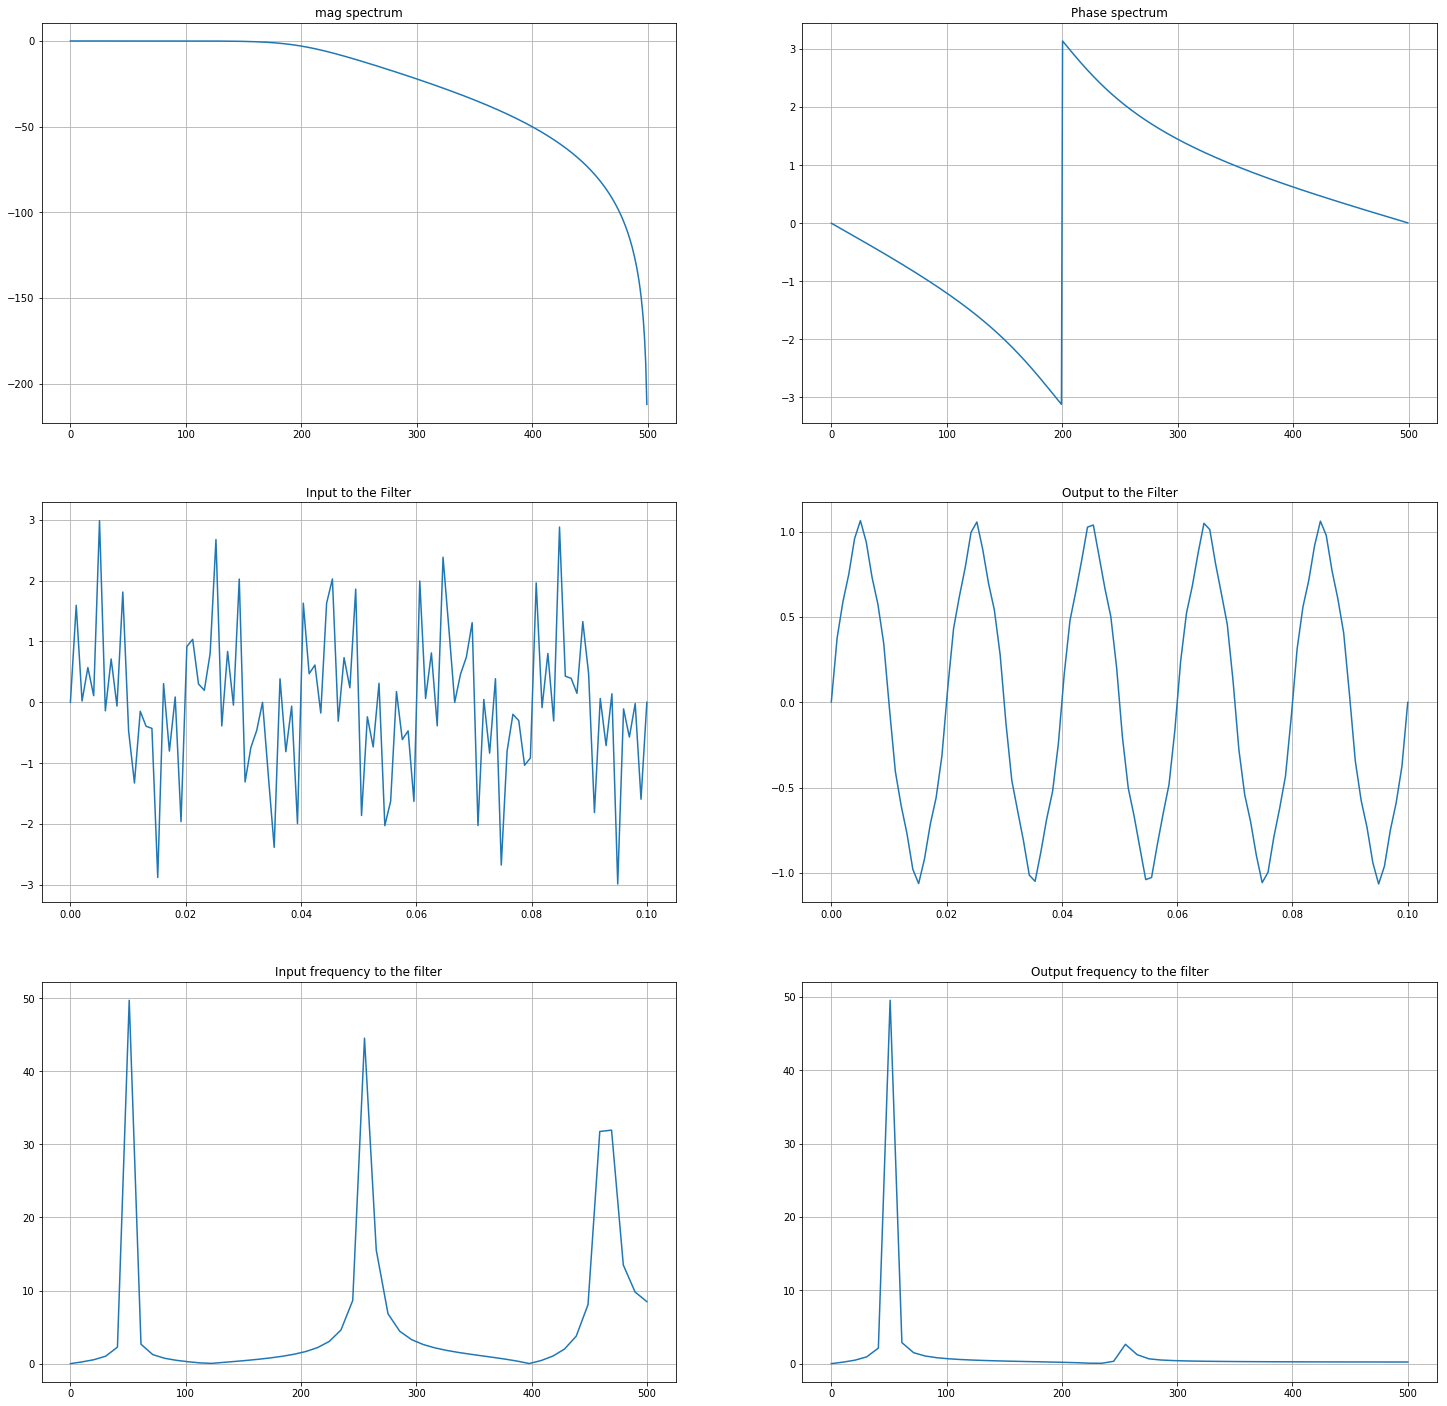

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

f=1000
fp = 200; fs=400; pa=3; sa=50

wp = (2*fp)/f; ws = (2*fs)/f;

# Computes order and cutoff frequency of the filter
n, wc = signal.buttord(wp, ws, pa, sa)

a, b = signal.butter(n, wc);  #LPF
#a, b = signal.butter(n, wc,'high');  #HPF
#a, b = signal.butter(n, [wp, ws], 'bandpass');  #BANDPASS
#a, b = signal.butter(n, [wp, ws], 'stop');  #STOP BAND

W, H = signal.freqz(a, b)
W = W*f/(2*np.pi)

fig = plt.figure(figsize=(25,25))
fig.add_subplot(321)
plt.plot(W, 20*np.log10(np.abs(H)))
plt.grid(); plt.title('mag spectrum')
#plt.ylim(-15,1)

plt.subplot(322)
plt.plot(W, np.angle(H))
plt.grid(); plt.title('Phase spectrum')

## Time domain response of the system
t = np.linspace(0, .1, 100)
x = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*250*t) + np.sin(2*np.pi*450*t)

y = signal.filtfilt(a, b, x)

fig.add_subplot(323)
plt.plot(t, x)
plt.grid(); plt.title('Input to the Filter')

fig.add_subplot(324)
plt.plot(t, y)
plt.grid(); plt.title('Output to the Filter')

## Frequency domain respomse of the system
X = np.fft.fft(x)
Y = np.fft.fft(y)
N = len(X)
# f1 = f*np.arrange(N)/N
f1 = np.linspace(0, f//2, N//2)

fig.add_subplot(325)
plt.plot(f1, np.abs(X[:N//2]))
plt.grid(); plt.title('Input frequency to the filter')

fig.add_subplot(326)
plt.plot(f1, np.abs(Y[:N//2]))
plt.grid()
plt.title('Output frequency to the filter')

plt.savefig("Butterworth Filter - LPF")
#plt.savefig("Butterworth Filter - HPF")
#plt.savefig("Butterworth Filter - BAND PASS")
#plt.savefig("Butterworth Filter - STOP BAND")

## NOTES
JUST FOR PRACTICE